In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:D,AJ:AL,AP:AR')
df = df[df['location'] == 'South Korea']
df.rename(columns={'location':'국가','date':'일자','people_vaccinated':'1차접종',
                  'people_fully_vaccinated':'2차접종','total_boosters':'3차접종',
                  'people_vaccinated_per_hundred':'1차접종률',
                  'people_fully_vaccinated_per_hundred':'2차접종률',
                  'total_boosters_per_hundred':'3차접종률'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] >= '21.02.26']
df[['1차접종','2차접종','3차접종']] = df[['1차접종','2차접종','3차접종']].astype(int)
df

,국가,일자,1차접종,2차접종,3차접종,1차접종률,2차접종률,3차접종률
193223,South Korea,21.02.26,38914,11114,1,0.08,0.02,0.00
193224,South Korea,21.02.27,40661,11327,1,0.08,0.02,0.00
193225,South Korea,21.02.28,41692,11429,1,0.08,0.02,0.00
193226,South Korea,21.03.01,43631,11688,1,0.08,0.02,0.00
193227,South Korea,21.03.02,109861,11984,2,0.21,0.02,0.00
...,...,...,...,...,...,...,...,...
193830,South Korea,22.10.26,45119933,44689319,41176992,87.08,86.25,79.47
193831,South Korea,22.10.27,45120106,44689581,41183287,87.08,86.25,79.48
193832,South Korea,22.10.28,0,0,0,0.00,0.00,0.00
193833,South Korea,22.10.29,0,0,0,0.00,0.00,0.00


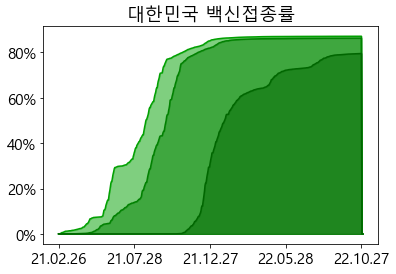

In [3]:
x = df['일자']; y1 = df['1차접종률']; y2 = df['2차접종률']; y3 = df['3차접종률']
plt.plot(x, y1, color='#00a000')
plt.plot(x, y2, color='#008000')
plt.plot(x, y3, color='#006600')
plt.fill_between(x[0:], y1[0:], color='#00a000', alpha=0.5)
plt.fill_between(x[0:], y2[0:], color='#008000', alpha=0.5)
plt.fill_between(x[0:], y3[0:], color='#006600', alpha=0.5)
plt.xticks(range(0, len(x), (len(x)-1)//4))
labels = ['0%', '20%', '40%', '60%', '80%']
plt.yticks(range(0, 100, 20), labels=labels)
plt.title('대한민국 백신접종률')
plt.show()